nosimrun 100
nosimrun 100


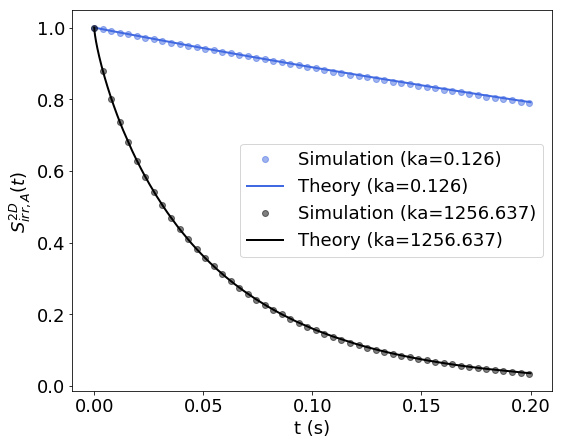

In [95]:
import glob
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

L=6.5
f=1.0208582
kaf=100
NN=423
Area=42.3799
conc = NN/Area
ks=[0.01,100]

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return -dst/stsim/C

def getst(N,pattern,ds):   
    fns = glob.glob(pattern)
    fns=fns[:100]
    y=0
    tlast=0
    for fn in fns:
        r=np.loadtxt(fn,delimiter=',')
        y+=np.array(r).T[1][::ds]
        if tlast==0:
            tlast=np.array(r).T[0][-1]
        assert(tlast==np.array(r).T[0][-1])
    x=np.array(r).T[0][::ds]
    print('nosimrun',len(fns))
    y/=float(len(fns))
    s=y/float(N)
    return x,s       

tend=0.2
D=1
rm=0.005
kd= 4.0*pi*D
fig,ax=plt.subplots(1,1,figsize=(8.6,7))
fs=18
ms=12
lw=2
mks = ['s','o']
ls=['--','-']
c=['royalblue','k']
for i,kaf in enumerate(ks):
    mk=mks[i]
    ka=kaf*kd
    pattern = '/home/chew/outputdata/keff/2D/newkfac{}_N{}_L{}_50tm_{}rm/*'.format(kaf,NN,L,f)
    t,st=getst(NN,pattern,1)    
    st=st[t<tend]
    t=t[t<tend] 
    ds=3
    ax.plot(t[::ds],st[::ds],'.',color=c[i],linestyle=' ',label='Simulation (ka={:.3f})'.format(ka),markersize=ms,alpha=0.5)
#load continuum data
    name = '/home/chew/outputdata/2ndpaper/stck_kf{}.csv'.format(kaf)
    T,ST = np.loadtxt(name,delimiter=',').T   
    ax.plot(T,ST,'-',color=c[i],label='Theory (ka={:.3f})'.format(ka),linewidth=lw)
    #kt = calk(st,t,conc)
    #name = '/home/chew/outputdata/2ndpaper/irrxn_kt_kf={}'.format(kaf)
    #print(name)
    #filename=open(name,'w')
    #np.savetxt(name,[t,kt],delimiter=',',fmt='%s')
    #filename.close()   
ax.set_xlabel('t (s)',fontsize=fs)
ax.set_ylabel('$S_{irr,A}^{2D}(t)$ ',fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(loc='best',fontsize=fs)
plt.savefig("/home/chew/ecellwork/figure/2ndpaper/fig1b",format='pdf',dpi=800)        

0.0013026893306340498
0.0013026893306340498


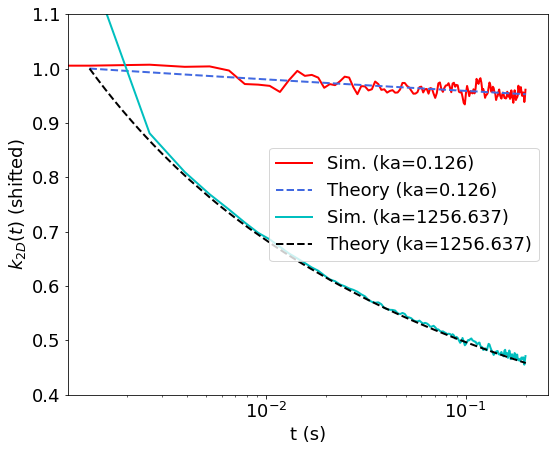

In [96]:
from math import pi
fig,ax=plt.subplots(1,1,figsize=(8.6,7))
fs=18
ms=12
lw=2
D=1
rm=0.005
kd= 4.0*pi*D
R=0.01
f=1.0208582
l=R*f
td=l*l/4/D
mks = ['s','o']
ls=['--','-']
cs=['r','c']
for i,kaf in enumerate(ks):
    mk=mks[i]
    ka = kaf*kd
    name = '/home/chew/outputdata/2ndpaper/irrxn_kt_kf={}'.format(kaf)
    t,kt = np.loadtxt(name,delimiter=',')    
    firstt=t[1]
    print(firstt)
    name = '/home/chew/outputdata/2ndpaper/ktL_kf{}.csv'.format(kaf)
    T,KT = np.loadtxt(name,delimiter=',').T   
    KT=KT[T>firstt]
    T=T[T>firstt]
    first=KT[0]
    ax.plot(t,kt/first,'-',c=cs[i],label='Sim. (ka={:.3f})'.format(ka),linewidth=lw)
    ax.semilogx(T,KT/first,'--',c=c[i],label='Theory (ka={:.3f})'.format(ka),linewidth=lw)
ax.set_xlabel('t (s)',fontsize=fs)
ax.set_ylabel('$k_{2D}(t)$ (shifted)',fontsize=fs)
ax.set_ylim(0.4,1.1)
ax.tick_params(labelsize=fs)
ax.legend(loc=7,fontsize=fs)
plt.savefig("/home/chew/ecellwork/figure/2ndpaper/fig1a",format='pdf',dpi=800)    

In [21]:
0.01*0.01/6,0.01*0.01/4

(1.6666666666666667e-05, 2.5e-05)